- Tiến hành tải dữ liệu vào chương trình ứng dụng Python và giải quyết vấn đề “Missing
header in the csv file”

In [8]:
import pandas as pd

column_name = ['Id','Name','Age','Weight','m0006','m0612','m1218','f0006','f0612','f1218']
df = pd.read_csv('patient_heart_rate.csv', header=0, names=column_name) # header=1 skips the first row
df.head(10)

,Id,Name,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218
0,1.0,Mickéy Mousé,56.0,70kgs,72,69,71,-,-,-
1,2.0,Donald Duck,34.0,154.89lbs,-,-,-,85,84,76
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72
3,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-
4,5.0,Pink Panther,54.0,198.658lbs,-,-,-,69,NaN,75
5,6.0,Huey McDuck,52.0,189lbs,-,-,-,68,75,72
6,7.0,Dewey McDuck,19.0,56kgs,-,-,-,71,78,75
7,8.0,Scööpy Doo,32.0,78kgs,78,76,75,-,-,-
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Xử lý vấn đề một cột lưu hỗn hợp nhiều dữ liệu, ở đây là cột “Name” chứa bao gồm
“Firstname” và “Lastname”, giải pháp là ta sẽ tách ra làm 2 cột

In [9]:
df[['Firstname','Lastname']] = df['Name'].str.split(expand=True)
df = df.drop('Name',axis=1)

In [10]:
df.head(5)

,Id,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,154.89lbs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,198.658lbs,-,-,-,69,NaN,75,Pink,Panther


- Cột Weight có vấn đề về không thống nhất các đơn vị đo lường trong dữ liệu. Ta sẽ
chuyển các đơn vị về thành đơn vị chuẩn “kg”

In [11]:
weight = df['Weight']

for i in range(0,len(weight)):
  x = str(weight[i])
  if 'lbs' in x[-3:]:
    x = x[:-3:]
    float_x = float(x)
    y = int(float_x/2.2)
    weight[i]=y
  if 'kgs' in x[-3:]:
    x = x[:-3:]
    weight[i]=x

<ipython-input-11-bb34b24dd314>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight[i]=x
<ipython-input-11-bb34b24dd314>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight[i]=y
<ipython-input-11-bb34b24dd314>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight[i]=x
<ipython-input-11-bb34b24dd314>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the document

- Đổi tên cột Weight thành Weight_kgs


In [12]:
df.rename(columns={'Weight':'Weight_kgs'},inplace=True)

In [13]:
df.head(5)

,Id,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,70,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90,-,-,-,69,NaN,75,Pink,Panther


- Vấn đề về xuất hiện dòng dữ liệu rỗng (không có giá trị: NaN). Giải pháp có thể đưa ra là
xóa bỏ

In [15]:
df.dropna(how='all',inplace=True)
df.head(10)

,Id,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,70,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90,-,-,-,69,NaN,75,Pink,Panther
5,6.0,52.0,85,-,-,-,68,75,72,Huey,McDuck
6,7.0,19.0,56,-,-,-,71,78,75,Dewey,McDuck
7,8.0,32.0,78,78,76,75,-,-,-,Scööpy,Doo
10,9.0,52.0,85,-,-,-,68,75,72,Huey,McDuck
11,10.0,12.0,45,-,-,-,92,95,87,Louie,McDuck


- Có nhiều dòng dữ liệu bị trùng lắp thông tin hoàn toàn[fullname, lastname, age,
weight_kgs,....], giải pháp đưa ra là chỉ giữ lại một dòng dữ liệu, tuy nhiên giải pháp phải
dựa trên nghiệp vụ của tập dữ liệu và quan sát của người xử lý.

In [19]:
df = df.drop_duplicates(subset=['Firstname','Lastname','Age','Weight_kgs'])
df

,Id,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,70,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90,-,-,-,69,NaN,75,Pink,Panther
5,6.0,52.0,85,-,-,-,68,75,72,Huey,McDuck
6,7.0,19.0,56,-,-,-,71,78,75,Dewey,McDuck
7,8.0,32.0,78,78,76,75,-,-,-,Scööpy,Doo
11,10.0,12.0,45,-,-,-,92,95,87,Louie,McDuck
12,11.0,NaN,60,78,75,72,-,-,-,Henry,Nam


- Xuất hiện dữ liệu bị ảnh hưởng bởi lỗi non-ASCII, không định dạng ASCII. Giải pháp:
Tùy vào nghiệp vụ ta có thể: xóa dữ liệu tại đó, thay thế bằng dữ liệu khác hoặc thay
bằng việc đánh dấu bằng một kí tự khác (ví dụ: ‘warning’)

In [20]:
df.Firstname.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
df.Lastname.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
print(df)

      Id   Age Weight_kgs m0006 m0612 m1218 f0006 f0612 f1218 Firstname  \
0    1.0  56.0         70    72    69    71     -     -     -     Micky   
1    2.0  34.0         70     -     -     -    85    84    76    Donald   
2    3.0  16.0        NaN     -     -     -    65    69    72      Mini   
3    4.0   NaN         78    78    79    72     -     -     -   Scrooge   
4    5.0  54.0         90     -     -     -    69   NaN    75      Pink   
5    6.0  52.0         85     -     -     -    68    75    72      Huey   
6    7.0  19.0         56     -     -     -    71    78    75     Dewey   
7    8.0  32.0         78    78    76    75     -     -     -      Scpy   
11  10.0  12.0         45     -     -     -    92    95    87     Louie   
12  11.0   NaN         60    78    75    72     -     -     -     Henry   
13  12.0  34.0        NaN    65    67    55     -     -     -    Michel   
14  13.0   NaN        NaN     -     -     -    68    72    70      Tana   
15  14.0   NaN        NaN

<ipython-input-20-0403d4a73dc7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Lastname.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)


- “Missing values”, vấn đề này xảy ra tại các cột “Age”, “Weight” và “Heart Rate”. Thiếu
dữ liệu (dữ liệu không đầy đủ) là vấn đề xảy ra nhiều trong các nguồn dữ liệu do nhiều
nguyên nhân chủ quan lẫn khách quan. Có một vài giải pháp để xử lý vấn đề này, chủ yếu
dựa trên kinh nghiệm và nghiệp vụ về tập dữ liệu đó.

- Thay giá trị thiếu của tuổi bằng giá trị yếu vị.

In [23]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True)
df

<ipython-input-23-721408fecf22>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mode()[0], inplace=True)


,Id,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70,72,69,71,-,-,-,Micky,Mous
1,2.0,34.0,70,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,34.0,78,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90,-,-,-,69,NaN,75,Pink,Panther
5,6.0,52.0,85,-,-,-,68,75,72,Huey,McDuck
6,7.0,19.0,56,-,-,-,71,78,75,Dewey,McDuck
7,8.0,32.0,78,78,76,75,-,-,-,Scpy,Doo
11,10.0,12.0,45,-,-,-,92,95,87,Louie,McDuck
12,11.0,34.0,60,78,75,72,-,-,-,Henry,Nam


- Thay giá trị thiếu của cân nặng bằng giá trị trung vị


In [25]:
df['Weight_kgs'].fillna(df['Weight_kgs'].median(), inplace=True)
df

<ipython-input-25-5b3b7ced66ce>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight_kgs'].fillna(df['Weight_kgs'].median(), inplace=True)


,Id,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70,72,69,71,-,-,-,Micky,Mous
1,2.0,34.0,70,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,74.0,-,-,-,65,69,72,Mini,Mouse
3,4.0,34.0,78,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90,-,-,-,69,NaN,75,Pink,Panther
5,6.0,52.0,85,-,-,-,68,75,72,Huey,McDuck
6,7.0,19.0,56,-,-,-,71,78,75,Dewey,McDuck
7,8.0,32.0,78,78,76,75,-,-,-,Scpy,Doo
11,10.0,12.0,45,-,-,-,92,95,87,Louie,McDuck
12,11.0,34.0,60,78,75,72,-,-,-,Henry,Nam


- “Một cột chứa quá nhiều thông tin cần được phân rã”, như trong bài toán này ta thấy
header “m0006” chứa các nội dung bao gồm: m → male, 0006 ~ 00-06 (lần đo chỉ số
nhịp tim từ 00h- đến 06h). Còn giá trị thì là kết quả đo nhịp tim.


In [26]:
#B1:Tạo melt dữ liệu để có cột gender_time
df = pd.melt(df, id_vars=['Id','Age','Weight_kgs','Firstname','Lastname'], value_name='PulseRate', var_name='gender_time').sort_values(['Id','Age','Weight_kgs','Firstname','Lastname'])
df


,Id,Age,Weight_kgs,Firstname,Lastname,gender_time,PulseRate
0,1.0,56.0,70,Micky,Mous,m0006,72
14,1.0,56.0,70,Micky,Mous,m0612,69
28,1.0,56.0,70,Micky,Mous,m1218,71
42,1.0,56.0,70,Micky,Mous,f0006,-
56,1.0,56.0,70,Micky,Mous,f0612,-
...,...,...,...,...,...,...,...
27,15.0,52.0,81,NaN,NaN,m0612,-
41,15.0,52.0,81,NaN,NaN,m1218,-
55,15.0,52.0,81,NaN,NaN,f0006,68
69,15.0,52.0,81,NaN,NaN,f0612,75


In [27]:
#Bước 2: Tạo data frame tạm là kết quả của việc tách cột gender_time

df_temp = df['gender_time'].str.extract('(\D)(\d+)(\d{2})',expand=True)
df_temp

,0,1,2
0,m,00,06
14,m,06,12
28,m,12,18
42,f,00,06
56,f,06,12
...,...,...,...
27,m,06,12
41,m,12,18
55,f,00,06
69,f,06,12


In [28]:
#Bước 3: Đặt tên cột cho data frame tạm

df_temp.columns = ['Gender','Lower_Hour','Upper_Hour']
df_temp

,Gender,Lower_Hour,Upper_Hour
0,m,00,06
14,m,06,12
28,m,12,18
42,f,00,06
56,f,06,12
...,...,...,...
27,m,06,12
41,m,12,18
55,f,00,06
69,f,06,12


In [29]:
#Bước 4: Nối data frame tạm vào data frame ban đầu

df = pd.concat([df,df_temp],axis=1)
df

,Id,Age,Weight_kgs,Firstname,Lastname,gender_time,PulseRate,Gender,Lower_Hour,Upper_Hour
0,1.0,56.0,70,Micky,Mous,m0006,72,m,00,06
14,1.0,56.0,70,Micky,Mous,m0612,69,m,06,12
28,1.0,56.0,70,Micky,Mous,m1218,71,m,12,18
42,1.0,56.0,70,Micky,Mous,f0006,-,f,00,06
56,1.0,56.0,70,Micky,Mous,f0612,-,f,06,12
...,...,...,...,...,...,...,...,...,...,...
27,15.0,52.0,81,NaN,NaN,m0612,-,m,06,12
41,15.0,52.0,81,NaN,NaN,m1218,-,m,12,18
55,15.0,52.0,81,NaN,NaN,f0006,68,f,00,06
69,15.0,52.0,81,NaN,NaN,f0612,75,f,06,12


In [30]:
#Bước 5: Bỏ cột gender_time

df = df.drop('gender_time',axis=1)
df

,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_Hour,Upper_Hour
0,1.0,56.0,70,Micky,Mous,72,m,00,06
14,1.0,56.0,70,Micky,Mous,69,m,06,12
28,1.0,56.0,70,Micky,Mous,71,m,12,18
42,1.0,56.0,70,Micky,Mous,-,f,00,06
56,1.0,56.0,70,Micky,Mous,-,f,06,12
...,...,...,...,...,...,...,...,...,...
27,15.0,52.0,81,NaN,NaN,-,m,06,12
41,15.0,52.0,81,NaN,NaN,-,m,12,18
55,15.0,52.0,81,NaN,NaN,68,f,00,06
69,15.0,52.0,81,NaN,NaN,75,f,06,12


- 12. Loại bỏ hết các dòng dữ liệu thừa là những dòng có phần PulseRate có dấu -


In [32]:
import numpy as np
df = df.replace('-',np.nan).dropna(subset=['PulseRate'])
df.head(10)

,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_Hour,Upper_Hour
0,1.0,56.0,70,Micky,Mous,72,m,00,06
14,1.0,56.0,70,Micky,Mous,69,m,06,12
28,1.0,56.0,70,Micky,Mous,71,m,12,18
43,2.0,34.0,70,Donald,Duck,85,f,00,06
57,2.0,34.0,70,Donald,Duck,84,f,06,12
71,2.0,34.0,70,Donald,Duck,76,f,12,18
44,3.0,16.0,74.0,Mini,Mouse,65,f,00,06
58,3.0,16.0,74.0,Mini,Mouse,69,f,06,12
72,3.0,16.0,74.0,Mini,Mouse,72,f,12,18
3,4.0,34.0,78,Scrooge,McDuck,78,m,00,06


- 13. Nhận thấy có những bệnh nhân chưa ghi nhận họ tên (ví lý do nào đó)

In [33]:
df['Firstname'].isnull().sum()
df['Lastname'].isnull().sum()

3

- Nhưng giá trị nhịp tim và thời gian đo nhịp tim thì đầy đủ nên dữ liệu quan tâm là trị số
nhịp tim vẫn dùng được, nên ta thay họ, tên bị thiếu thành Unknown

In [34]:
df['Firstname'].fillna('Unknown',inplace=True)
df['Lastname'].fillna('Unknown',inplace=True)
df

<ipython-input-34-d2fdd83e04b5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Firstname'].fillna('Unknown',inplace=True)
<ipython-input-34-d2fdd83e04b5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_Hour,Upper_Hour
0,1.0,56.0,70,Micky,Mous,72,m,00,06
14,1.0,56.0,70,Micky,Mous,69,m,06,12
28,1.0,56.0,70,Micky,Mous,71,m,12,18
43,2.0,34.0,70,Donald,Duck,85,f,00,06
57,2.0,34.0,70,Donald,Duck,84,f,06,12
71,2.0,34.0,70,Donald,Duck,76,f,12,18
44,3.0,16.0,74.0,Mini,Mouse,65,f,00,06
58,3.0,16.0,74.0,Mini,Mouse,69,f,06,12
72,3.0,16.0,74.0,Mini,Mouse,72,f,12,18
3,4.0,34.0,78,Scrooge,McDuck,78,m,00,06


- 14. Sau khi xử lý thì index của dòng dữ liệu đã thay đổi lung tung, ta cần reset index lại cho
theo khuôn mẫu

In [35]:
df = df.reset_index()
df

,index,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_Hour,Upper_Hour
0,0,1.0,56.0,70,Micky,Mous,72,m,00,06
1,14,1.0,56.0,70,Micky,Mous,69,m,06,12
2,28,1.0,56.0,70,Micky,Mous,71,m,12,18
3,43,2.0,34.0,70,Donald,Duck,85,f,00,06
4,57,2.0,34.0,70,Donald,Duck,84,f,06,12
5,71,2.0,34.0,70,Donald,Duck,76,f,12,18
6,44,3.0,16.0,74.0,Mini,Mouse,65,f,00,06
7,58,3.0,16.0,74.0,Mini,Mouse,69,f,06,12
8,72,3.0,16.0,74.0,Mini,Mouse,72,f,12,18
9,3,4.0,34.0,78,Scrooge,McDuck,78,m,00,06


- 15. Sau đó, lưu trữ dữ liệu đã xử lý thành công với tên file patient_heart_rate_clean.csv

In [36]:
df.to_csv('patient_heart_rate_clean.csv')

PHAN TICH DU LIEU

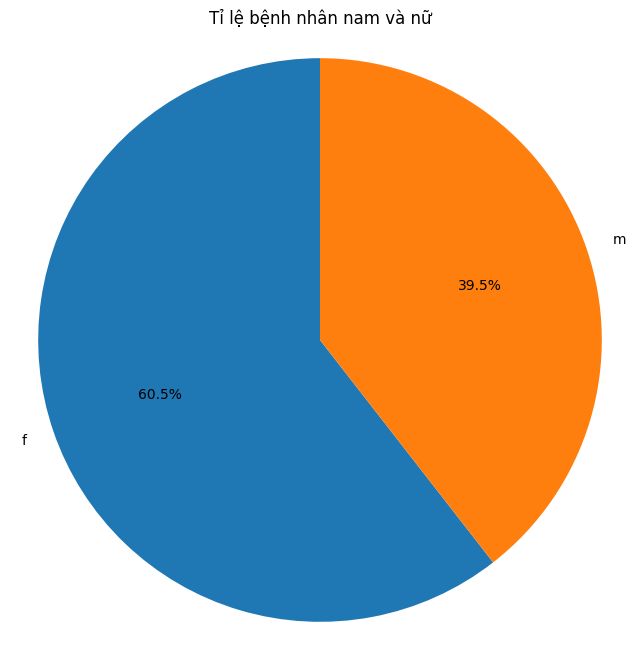

In [39]:
#1. Vẽ biểu đồ Pie để thể hiện tỉ lệ bệnh nhân nam và nữ

import matplotlib.pyplot as plt

# Đếm số lượng bệnh nhân nam và nữ
gender_counts = df['Gender'].value_counts()

# Vẽ biểu đồ pie
plt.figure(figsize=(8, 8))  # Điều chỉnh kích thước biểu đồ
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Tỉ lệ bệnh nhân nam và nữ')
plt.axis('equal')  # Đảm bảo hình tròn đều
plt.show()

In [40]:
#2. Hãy tạo cột Fullname = Firstname+’ ‘+Lastname

df['Fullname'] = df['Firstname'] + ' ' + df['Lastname']
df

,index,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_Hour,Upper_Hour,Fullname
0,0,1.0,56.0,70,Micky,Mous,72,m,00,06,Micky Mous
1,14,1.0,56.0,70,Micky,Mous,69,m,06,12,Micky Mous
2,28,1.0,56.0,70,Micky,Mous,71,m,12,18,Micky Mous
3,43,2.0,34.0,70,Donald,Duck,85,f,00,06,Donald Duck
4,57,2.0,34.0,70,Donald,Duck,84,f,06,12,Donald Duck
5,71,2.0,34.0,70,Donald,Duck,76,f,12,18,Donald Duck
6,44,3.0,16.0,74.0,Mini,Mouse,65,f,00,06,Mini Mouse
7,58,3.0,16.0,74.0,Mini,Mouse,69,f,06,12,Mini Mouse
8,72,3.0,16.0,74.0,Mini,Mouse,72,f,12,18,Mini Mouse
9,3,4.0,34.0,78,Scrooge,McDuck,78,m,00,06,Scrooge McDuck


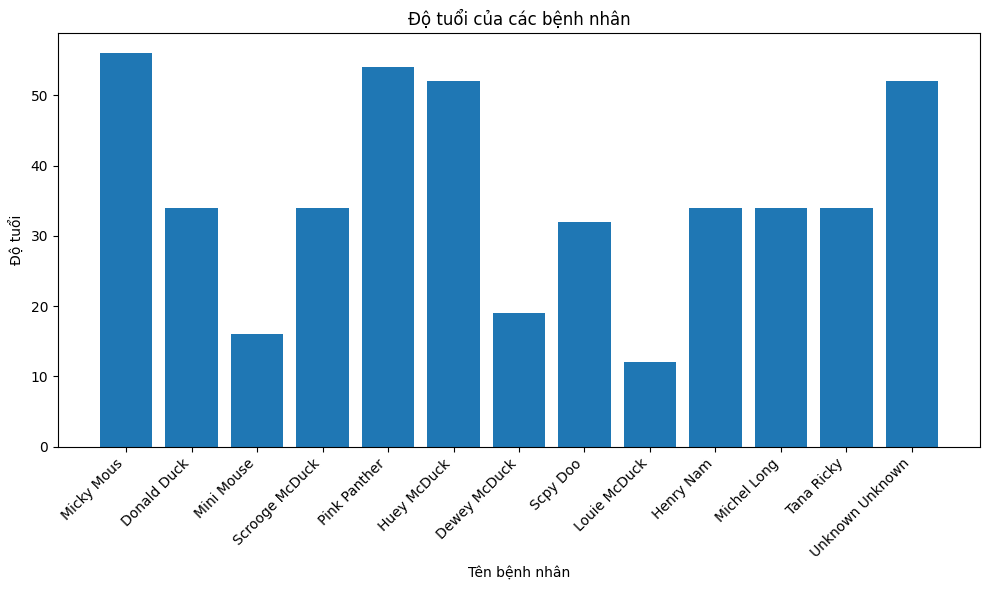

In [41]:
#3. Vẽ biểu đồ cột so sánh độ tuổi giữa các tên bệnh nhân

import matplotlib.pyplot as plt

# Vẽ biểu đồ cột so sánh độ tuổi giữa các tên bệnh nhân
plt.figure(figsize=(10, 6))  # Điều chỉnh kích thước biểu đồ nếu cần

# Lấy danh sách tên bệnh nhân và độ tuổi tương ứng
patient_names = df['Fullname'].unique()
ages = []
for name in patient_names:
    ages.append(df[df['Fullname'] == name]['Age'].iloc[0])  # Lấy độ tuổi đầu tiên của mỗi bệnh nhân


# Vẽ biểu đồ cột
plt.bar(patient_names, ages)
plt.xlabel('Tên bệnh nhân')
plt.ylabel('Độ tuổi')
plt.title('Độ tuổi của các bệnh nhân')
plt.xticks(rotation=45, ha='right') # Xoay nhãn trục x để tránh bị chồng chéo
plt.tight_layout() # Điều chỉnh bố cục để tránh các nhãn bị cắt
plt.show()

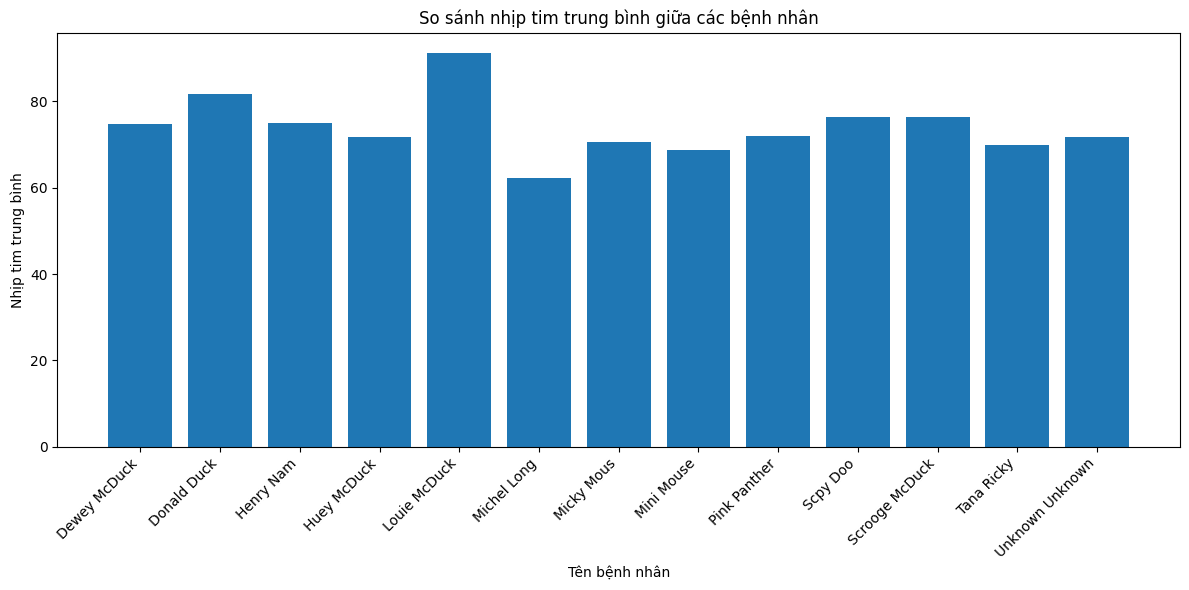

In [43]:
#4. Vẽ biểu đồ cột so sánh nhịp tim trung bình giữa các tên bệnh nhân(ghi chu, comment bang tieng viet)

# Vẽ biểu đồ cột so sánh nhịp tim trung bình giữa các tên bệnh nhân
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Đảm bảo cột 'PulseRate' là số trước khi tính giá trị trung bình
df['PulseRate'] = pd.to_numeric(df['PulseRate'], errors='coerce') # Chuyển đổi 'PulseRate' thành số, thay thế các giá trị không phải số bằng NaN

# Tính nhịp tim trung bình cho mỗi bệnh nhân
average_pulse_rates = df.groupby('Fullname')['PulseRate'].mean()

# Vẽ biểu đồ cột
plt.bar(average_pulse_rates.index, average_pulse_rates.values)
plt.xlabel('Tên bệnh nhân')
plt.ylabel('Nhịp tim trung bình')
plt.title('So sánh nhịp tim trung bình giữa các bệnh nhân')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

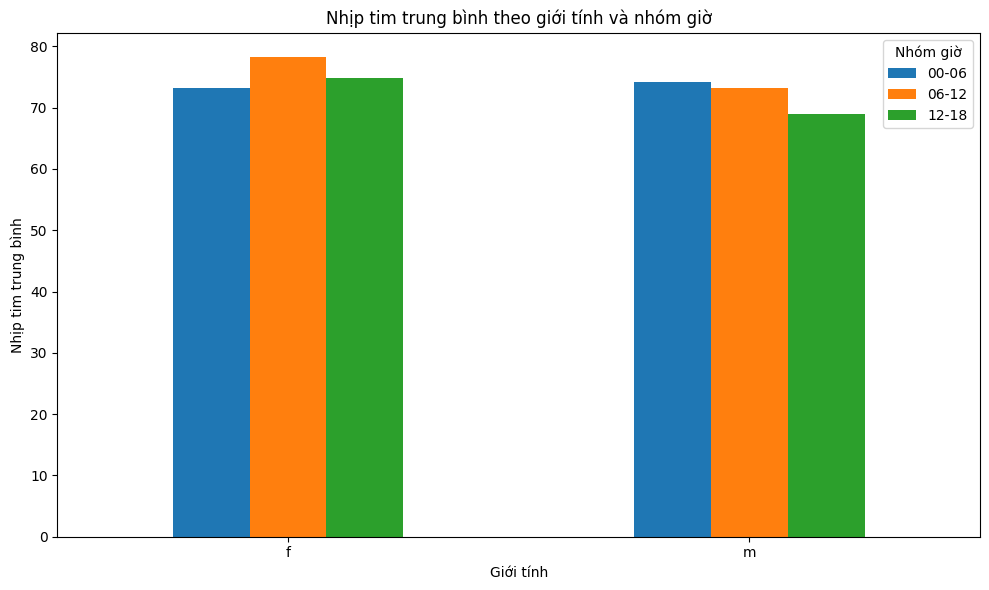

In [44]:
# 5. Vẽ biểu đồ cột so sánh nhịp tim trung bình theo từng nhóm giờ 00-06, 06-12,12-18 có
# phân loại theo giới tính

# 5. Vẽ biểu đồ cột so sánh nhịp tim trung bình theo từng nhóm giờ 00-06, 06-12,12-18 có phân loại theo giới tính
import matplotlib.pyplot as plt

# Tạo cột 'TimeGroup' để nhóm giờ
def categorize_time(row):
    if row['Lower_Hour'] == '00':
        return '00-06'
    elif row['Lower_Hour'] == '06':
        return '06-12'
    elif row['Lower_Hour'] == '12':
        return '12-18'
    else:
        return 'Unknown'

df['TimeGroup'] = df.apply(lambda row: categorize_time(row), axis=1)

# Tính nhịp tim trung bình theo giới tính và nhóm giờ
average_pulse_by_gender_time = df.groupby(['Gender', 'TimeGroup'])['PulseRate'].mean().unstack()

# Vẽ biểu đồ cột
average_pulse_by_gender_time.plot(kind='bar', figsize=(10, 6))
plt.title('Nhịp tim trung bình theo giới tính và nhóm giờ')
plt.xlabel('Giới tính')
plt.ylabel('Nhịp tim trung bình')
plt.xticks(rotation=0)
plt.legend(title='Nhóm giờ')
plt.tight_layout()
plt.show()

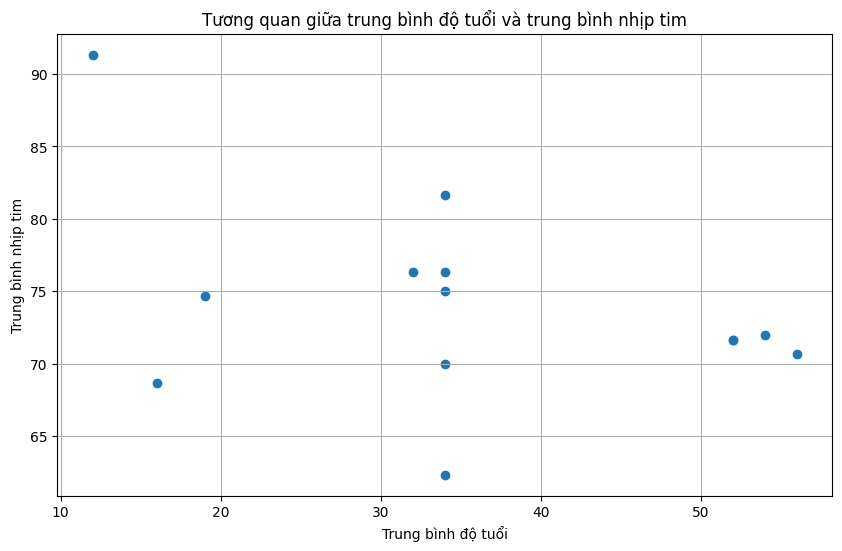

In [45]:
# 6. Vẽ biểu đồ phân tán thể hiện tương quan giữa trung bình độ tuổi và trung bình nhịp tim

# Tính trung bình độ tuổi và trung bình nhịp tim cho mỗi bệnh nhân
average_age_pulse = df.groupby('Fullname').agg({'Age': 'mean', 'PulseRate': 'mean'})

# Vẽ biểu đồ phân tán
plt.figure(figsize=(10, 6))
plt.scatter(average_age_pulse['Age'], average_age_pulse['PulseRate'])
plt.xlabel('Trung bình độ tuổi')
plt.ylabel('Trung bình nhịp tim')
plt.title('Tương quan giữa trung bình độ tuổi và trung bình nhịp tim')
plt.grid(True)
plt.show()

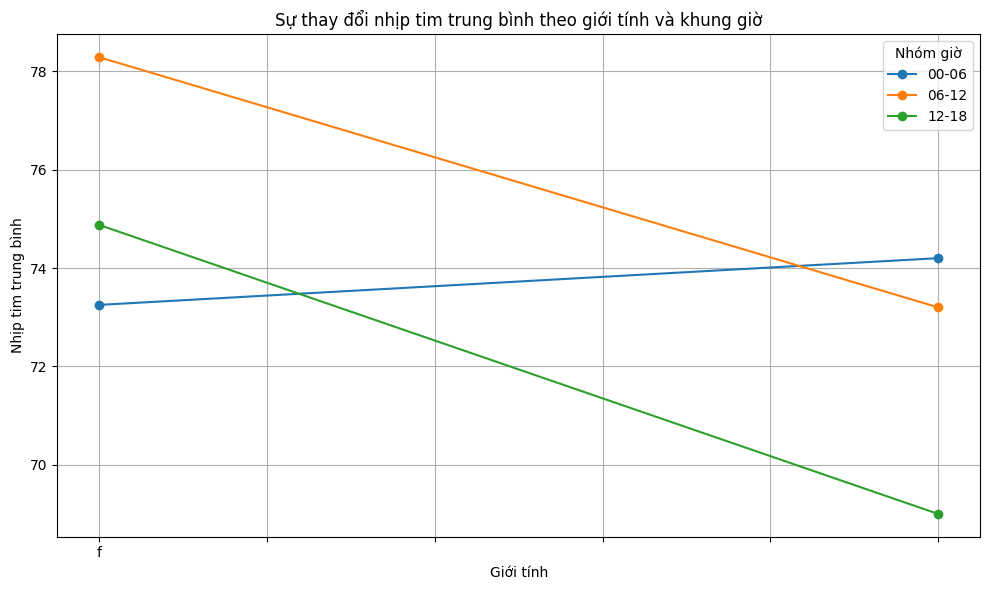

In [46]:
# 7. Vẽ biểu đồ đường thể hiện sự thay đổi của nhịp tim trung bình các bệnh nhân theo thứ tự
# khung giờ 00-06, 06-12,12-18 theo từng nhóm giới tính.

import matplotlib.pyplot as plt

# Tính nhịp tim trung bình theo giới tính và nhóm giờ
average_pulse_by_gender_time = df.groupby(['Gender', 'TimeGroup'])['PulseRate'].mean().unstack()

# Vẽ biểu đồ đường
average_pulse_by_gender_time.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Sự thay đổi nhịp tim trung bình theo giới tính và khung giờ')
plt.xlabel('Giới tính')
plt.ylabel('Nhịp tim trung bình')
plt.xticks(rotation=0)
plt.legend(title='Nhóm giờ')
plt.grid(True) # Thêm lưới nền cho dễ quan sát
plt.tight_layout()
plt.show()